# Python Project - PROSPER LOAN
##                     by Emmy9ce

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling

In [1]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# load in the data and printing basics statistics
df = pd.read_csv('ProsperLoan.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# overview of data shape and composition
print(df.shape)

(113937, 81)


In [4]:
# with so many columns in the dataset i wil be choosing features based on interest
features = ['LoanOriginalAmount', 'LoanStatus', 'Term', 'EmploymentStatus', 'EmploymentStatusDuration', 'Occupation',\
            'BorrowerState', 'StatedMonthlyIncome', 'IncomeRange', 'DebtToIncomeRatio', 'BorrowerRate', 'BorrowerAPR',\
            'IsBorrowerHomeowner', 'ProsperScore', 'LoanOriginationDate']
features_data = df[features]

In [5]:
features_data.head()

,LoanOriginalAmount,LoanStatus,Term,EmploymentStatus,EmploymentStatusDuration,Occupation,BorrowerState,StatedMonthlyIncome,IncomeRange,DebtToIncomeRatio,BorrowerRate,BorrowerAPR,IsBorrowerHomeowner,ProsperScore,LoanOriginationDate
0,9425,Completed,36,Self-employed,2.0,Other,CO,3083.333333,"$25,000-49,999",0.17,0.1580,0.16516,True,NaN,12/09/2007 00:00
1,10000,Current,36,Employed,44.0,Professional,CO,6125.000000,"$50,000-74,999",0.18,0.0920,0.12016,False,7.0,03/03/2014 00:00
2,3001,Completed,36,Not available,NaN,Other,GA,2083.333333,Not displayed,0.06,0.2750,0.28269,False,NaN,17/01/2007 00:00
3,10000,Current,36,Employed,113.0,Skilled Labor,GA,2875.000000,"$25,000-49,999",0.15,0.0974,0.12528,True,9.0,01/11/2012 00:00
4,15000,Current,36,Employed,44.0,Executive,MN,9583.333333,"$100,000+",0.26,0.2085,0.24614,True,4.0,20/09/2013 00:00


---

### What is the structure of your dataset?

> The dataset has 113,937 loans with 81 variables on each loan. I will be interested in a subset of those variables including loan amount, occupation, employment status, borrower rate, Borrower APR, current loan status, borrower income, and many others. Variables are loan information and borrower information.


### What is/are the main feature(s) of interest in your dataset?

> I’m most interested in figuring out what features surrounding borrowers who take loans in which I will be considering the variables that most influence that decision.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I would most probably need to look at the borrowers information such as Occupation , StatedMonthlyIncome, and DebtIncomeRatio which would also have effect on the Borrower’s APR and LoanSatus.

## missing dataset and descriptive statistics for numeric variables


In [6]:
# how many missing valuesin the dataset
missing_value_counts = features_data.isnull().sum()
missing_value_counts

LoanOriginalAmount              0
LoanStatus                      0
Term                            0
EmploymentStatus             2255
EmploymentStatusDuration     7625
Occupation                   3588
BorrowerState                5515
StatedMonthlyIncome             0
IncomeRange                     0
DebtToIncomeRatio            8554
BorrowerRate                    0
BorrowerAPR                    25
IsBorrowerHomeowner             0
ProsperScore                29084
LoanOriginationDate             0
dtype: int64

In [7]:
# percentage of missing data
total_data = np.product(features_data.shape)
total_missing = missing_value_counts.sum()

percent_missing = (total_missing/total_data) * 100
print(percent_missing)

3.3144632560099003


> with just 3.3% of our data missing we can go on with visualiztion but will take a closer look at some of the columns wih the missing values. ***EmploymentStatus*, *EmploymentStatusDuration*, *Occupation*, *BorrowerState*, *DebtToIncomeRatio* and ProsperScore** contain null values

In [8]:
# Descriptive statistics for numeric variables
features_data.describe()

,LoanOriginalAmount,Term,EmploymentStatusDuration,StatedMonthlyIncome,DebtToIncomeRatio,BorrowerRate,BorrowerAPR,ProsperScore
count,113937.00000,113937.000000,106312.000000,1.139370e+05,105383.000000,113937.000000,113912.000000,84853.000000
mean,8337.01385,40.830248,96.071582,5.608026e+03,0.275947,0.192764,0.218828,5.950067
std,6245.80058,10.436212,94.480605,7.478497e+03,0.551759,0.074818,0.080364,2.376501
min,1000.00000,12.000000,0.000000,0.000000e+00,0.000000,0.000000,0.006530,1.000000
25%,4000.00000,36.000000,26.000000,3.200333e+03,0.140000,0.134000,0.156290,4.000000
50%,6500.00000,36.000000,67.000000,4.666667e+03,0.220000,0.184000,0.209760,6.000000
75%,12000.00000,36.000000,137.000000,6.825000e+03,0.320000,0.250000,0.283810,8.000000
max,35000.00000,60.000000,755.000000,1.750003e+06,10.010000,0.497500,0.512290,11.000000


---

## Univariate Exploration


---

looking at the distribution of the main variable of interest:**Employment status**
> **Employment Status**: The employement status of the borrower at the time they posted the listing.

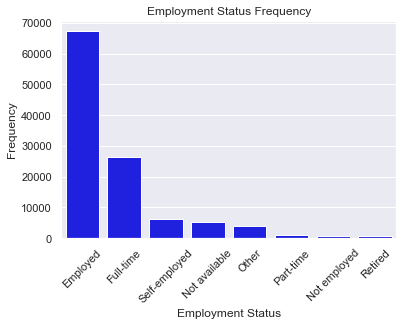

In [9]:
#plot the Employement Status
sns.set(style='darkgrid')
order_type = features_data['EmploymentStatus'].value_counts().index
sns.countplot(data=features_data, x='EmploymentStatus', color='blue', order= order_type)
plt.xticks(rotation = 45)
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.title('Employment Status Frequency')
plt.show();

> The graph above shows that the **Employed** and the **Full-time** are the most common borrowers

---

**NEXT** is the first predictor variable of interest: **Term**
> **Term**: The Length of the loan expressed in months.

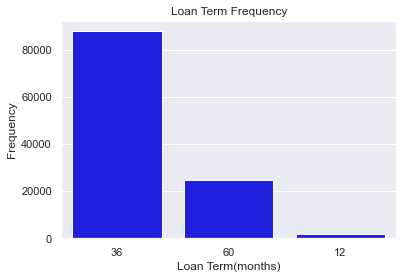

In [10]:
order_type = features_data['Term'].value_counts().index
sns.countplot(data=features_data, x='Term', color='blue', order= order_type)
plt.xlabel('Loan Term(months)')
plt.ylabel('Frequency')
plt.title('Loan Term Frequency')
plt.show();

> The length of the most common of the loans are 36 months then followed by 60 months which there were significantly fewer loans for that of 60-months and close to none for that of 12-months terms.

---

**Next** is the first predictor variable of interest: **ProsperScore**
> **ProsperScore**: A custom risk score using built historic prosper loan data. The score Range from 1-10, with 10 being the bestor lowest score  Applicable for loans originated after july 2009. 

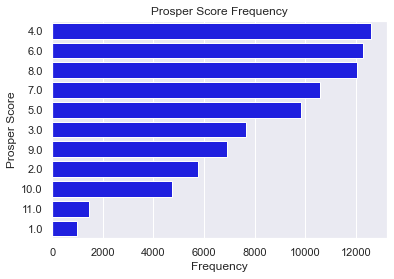

In [11]:
order_type = features_data['ProsperScore'].value_counts().index
sns.countplot(data=features_data, y='ProsperScore', color='blue', order= order_type)
plt.xlabel('Frequency')
plt.ylabel('Prosper Score')
plt.title('Prosper Score Frequency')
plt.show();

> It's Observed that the score risk is mostly between **4.0** and **8.0**, which places the risk at a good and average degree.
quite and interesting observation \
> Also noticing that the rate value equal **11.0** is out of range. this could be value falling under **NaN**

---

**Next** is the first predictor variable of interest: **BorrowerAPR** and **BorrowerRate**
> **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan. \
> **BorrowerRate**: The Borrower's interest rate for the loan.

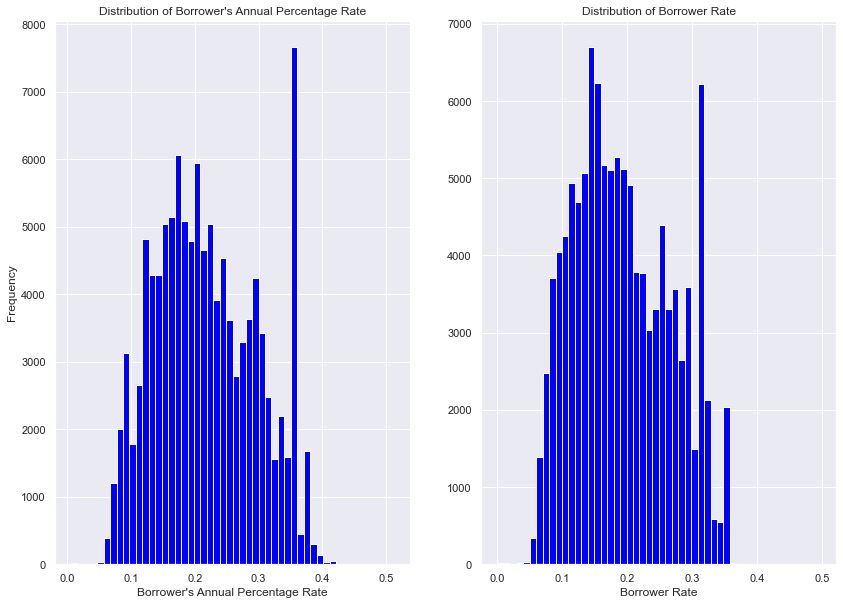

In [12]:
# plotting the distribution for BorrowerAPR
plt.subplots(figsize = [14,10])
plt.subplot(1,2,1)
plt.hist(data=features_data, x='BorrowerAPR', bins=50, color = 'blue')
plt.xlabel('Borrower\'s Annual Percentage Rate')
plt.title('Distribution of Borrower\'s Annual Percentage Rate');

plt.ylabel('Frequency');

# plotting the distribution for BorrowerRate
plt.subplot(1,2,2)
plt.hist(data=features_data, x='BorrowerRate', bins=50, color = 'blue')
plt.xlabel('Borrower Rate')
plt.title('Distribution of Borrower Rate');

> Both distribution are of normal distribution skewed right.

Borrower Rate and Borrower's Annual Percentage Rate are similar but considering that Borrower's Annual Percentage Rate contain some fees (such as discount points, most closing costs, mortgage insurance, and loan origination fees) and this will affect the total cost of the loan.

**Therefore we can say that Borrower's Annual Percentage Rate is greater than Borrower Rate**

---

**Next** is the first predictor variable of interest: **Occupation**
> **Occupation**: The Occupation selected by the Borrower at the time they created the listing.


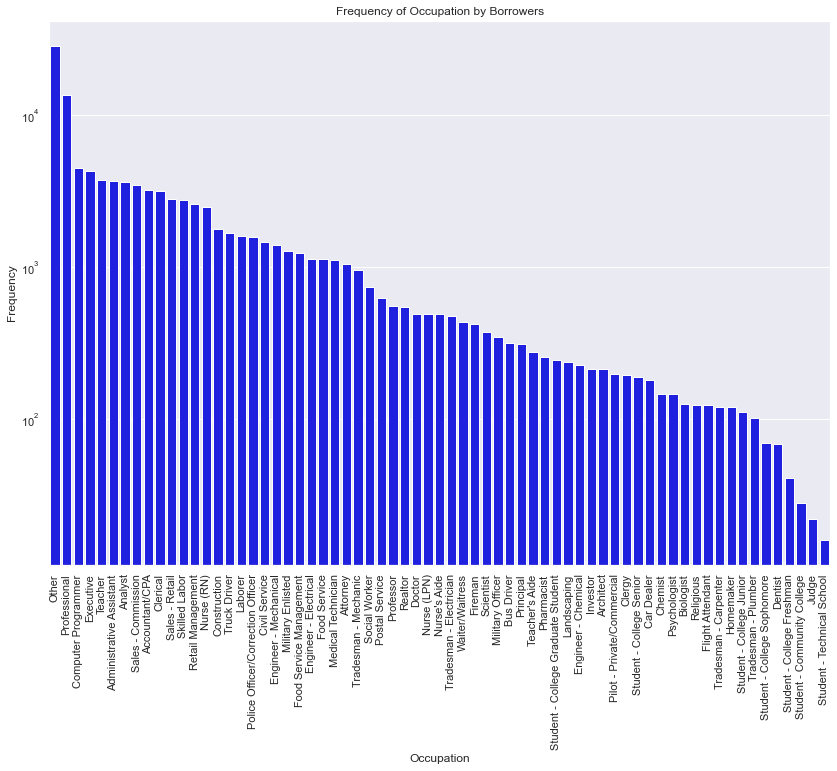

In [13]:
# plotting the Frequency of Occupation by Borrowers
plt.subplots(figsize = [14,10])
order_type = features_data['Occupation'].value_counts().index
o = sns.countplot(data=features_data, x='Occupation', color='blue', order= order_type)
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.title('Frequency of Occupation by Borrowers')
o.set(yscale='log')
plt.show();

> Due to huge variance between highest and lowest counts. I used Log Scale in my chart

The most common Occupation is **Others** then **Professional**, and that does not give us meaningful information so we will skip them and move to next ones we found that **computer programmer**, **Executives**, **Teacher**, **Administrative Assistant**, and **Analyst** are among the top occupations

---

**Next** is the first predictor variable of interest: **BorrowerState**
> **BorrowerState**: the state of the address of the borrower at the time the Listing was created.

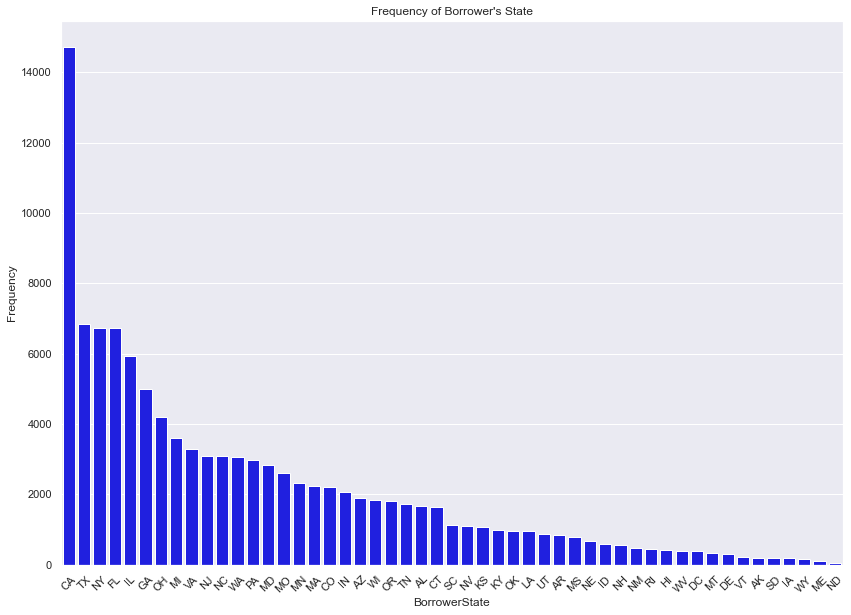

In [14]:
# plotting the Frequency of Occupation by Borrowers
plt.subplots(figsize = [14,10])
order_type = features_data['BorrowerState'].value_counts().index
s = sns.countplot(data=features_data, x='BorrowerState', color='blue', order= order_type)
plt.xticks(rotation=45)
plt.xlabel('BorrowerState')
plt.ylabel('Frequency')
plt.title('Frequency of Borrower\'s State')
o.set(yscale='log')
plt.show();

> Due to huge variance between highest and lowest counts. I used Log Scale in my chart

The most common State is **CA - CALIFORNIA** while **TX - TEXAS**, **NY - NEWYORK**, and **FL - FLORIDA** are among the top four states.

**Next** is the first predictor variable of interest: **DebtToIncomeRatio**

> **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

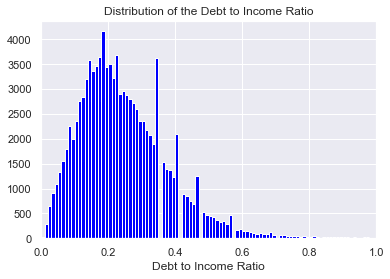

In [15]:
# Distribution of the Debt to Income Ratio
bins = np.arange(features_data.DebtToIncomeRatio.min(), features_data.DebtToIncomeRatio.max() +0.01,0.01)
plt.hist(data=features_data, x='DebtToIncomeRatio', bins=bins, color = 'blue')
plt.xlim(0,1)
plt.xlabel('Debt to Income Ratio')
plt.title('Distribution of the Debt to Income Ratio');

> The distribution of the DebtToIncomeRatio was highly skewed by the presence of those with very high incomes to their debt. This isn't unexpected in a real-world scenario and no changes to the data were performed to account for this. It will be interesting to see how this affects the interest rates of the loans.

---

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of Borrower Rate appears as normally distributed with a slight left skew. A small peak centered at 15%, a large peak centered at 30%, and a median found between them. There is also a small peak centered 30%. Additionally, and it's observed a few loans have a Borrower Rate greater than 35%.

There isn't need to implement any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> The distribution of the **DebtToIncomeRatio** was highly skewed by the presence of those with very high incomes to their debt. This isn't unexpected in a real-world scenario and does not need transformations implemented on data. just I limit x-axis to focus on distribution.

> For all of the bar charts that I used I reorded rank of them descending. So it's easy to detect the most common.

> In **occpution** chart, I noted huge variance between highest and lowest counts. I used Log Scale in my chart.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the Data.

> **I want to look at the pairwise correlations present between features in the data.**

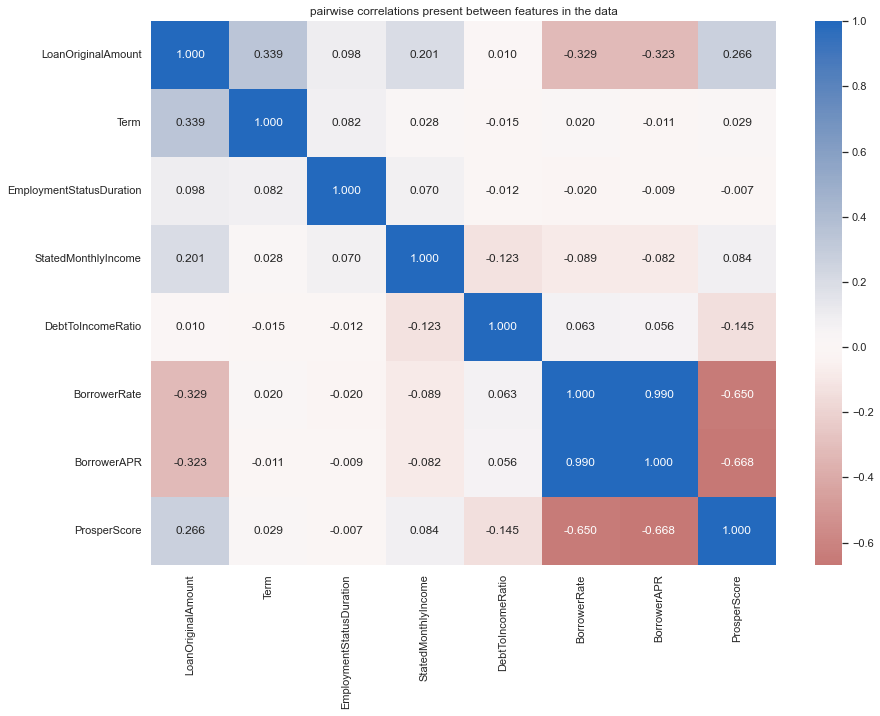

In [16]:
# allocating numeric and categorical variables 
numeric_vars = features_data.select_dtypes(include='number').columns
categoric_vars = ['Term', 'EmploymentStatus', 'ProsperScore']

# correlation plot
plt.figure(figsize = [14, 10])
sns.heatmap(features_data[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("pairwise correlations present between features in the data")
plt.show()

> BorrowerRate and BorrowerAPR have a great correlation between them, which makes sense since those values for a loan are similar to each other with a few differance.

**What's relationship between Term and ProsperScore ?**

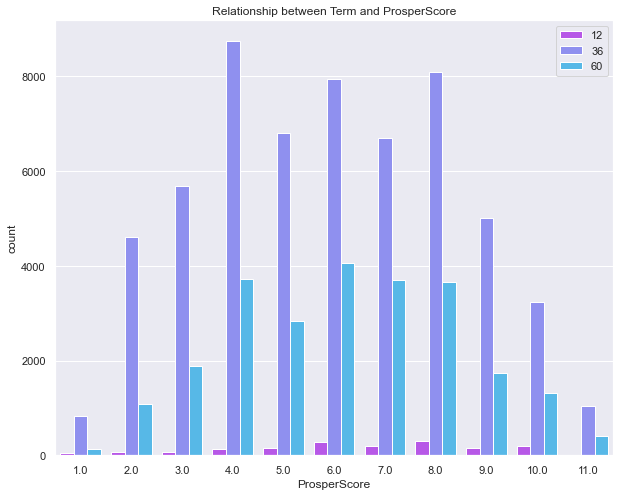

In [17]:
# Look at relationship between Term and ProsperScore
plt.figure(figsize = [10, 8])
sns.countplot(data=features_data, x='ProsperScore', hue='Term', palette='cool_r');
plt.legend(loc=1);
plt.title('Relationship between Term and ProsperScore');

> Interesting Observation here is that those with prosper score between 4.0 and 8.0 are seen with 36-month loans

**What's relation between Loan Original Amount and Borrower APR?**

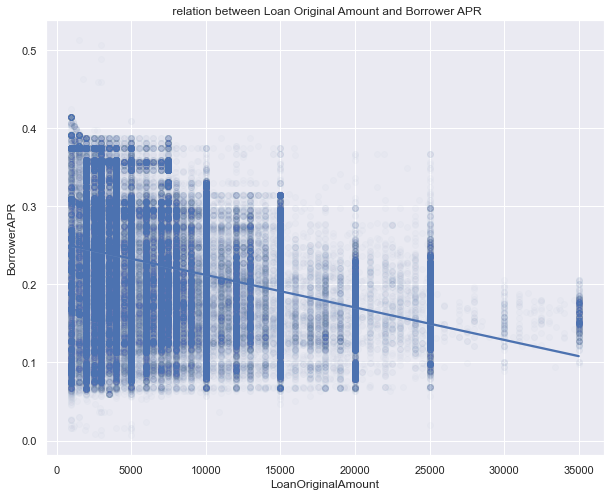

In [18]:
plt.figure(figsize = [10, 8])
sns.regplot(data = features_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':1/50});
plt.title(" relation between Loan Original Amount and Borrower APR");

> From the Graph above I observed that at different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount. So the borrower's APR is negatively correlated with the total loan amount.

**What's most common Employment Status in each Prosper Score ?**

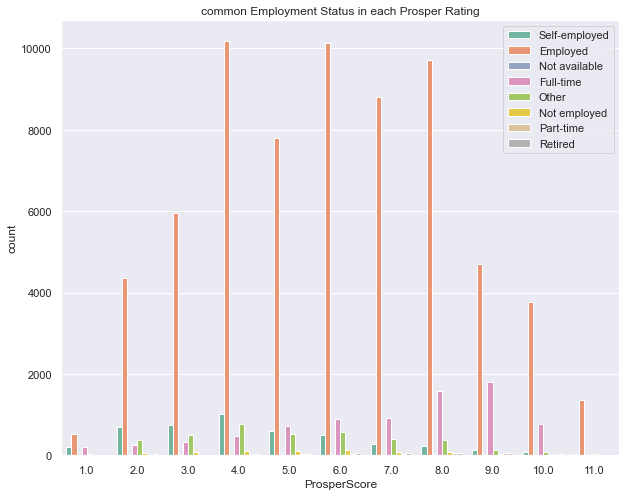

In [19]:
plt.figure(figsize = [10, 8])
sns.countplot(data=features_data, x='ProsperScore', hue='EmploymentStatus', palette='Set2');
plt.legend(loc=1);
plt.title("common Employment Status in each Prosper Rating");

> Lower ratings were noted to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired, and Part-Time.

**What's correlation between ProsperScore and BorrowerRate ?**

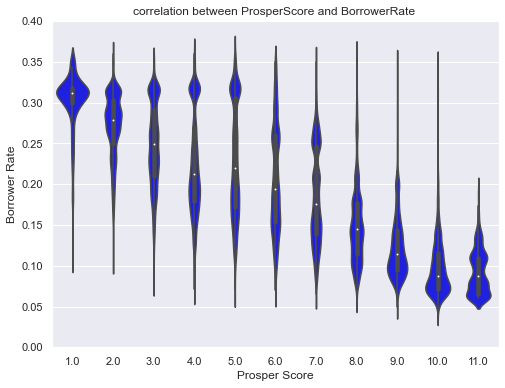

In [20]:
plt.figure(figsize = [8, 6])
sns.violinplot(data=features_data, x='ProsperScore', y='BorrowerRate', color='blue');
plt.ylim((0,0.4));
plt.xlabel("Prosper Score");
plt.ylabel("Borrower Rate");
plt.title("correlation between ProsperScore and BorrowerRate ");

> Here the ProsperScore has a decline but the distribution of the BorrowerRate is more distributed 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> BorrowerRate and BorrowerAPR have a great correlation between them, which makes sense since those values for a loan are similar to each other with a few differance.

> I observed that at different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount. So the borrower's APR is negatively correlated with the total loan amount.

the different sizes of the total loan amount, the borrower's APR has a large distribution, but the range of APR decreases with the increase of loan amount. So the borrower's APR is negatively correlated with the total loan amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  Lower ratings were noted to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired, and Part-Time.
> And prosper score between 4.0 and 8.0 are popular with 36-month loans


## Conclusions

> The length of the most common of the loans are 36 months with most common borrowers been the **Employed** and the **Full-time**

> It's Observed that the score risk is mostly between **4.0** and **8.0**, which places the risk at a good and average degree and Lower ratings were noted to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired, and Part-Time

> The most common notable Occupation are **computer programmer**, **Executives**, **Teacher**, **Administrative Assistant**, and **Analyst** are among the top occupations

> The most common State is **CA - CALIFORNIA** while **TX - TEXAS**, **NY - NEWYORK**, and **FL - FLORIDA** are among the top four states.

> **Borrower Rate and Borrower's Annual Percentage Rate are similar but considering that Borrower's Annual Percentage Rate contain some fees (such as discount points, most closing costs, mortgage insurance, and loan origination fees) and this will affect the total cost of the loan. Therefore we can say that Borrower's Annual Percentage Rate is greater than Borrower Rate**

> Finally borrower's APR is negatively correlated with the total loan amount.